In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/retail_price.csv'  # Update this to your file path
data = pd.read_csv(file_path)

# Convert any necessary columns to datetime or other types if needed
# For example, if there's a date column:
# data['date_column'] = pd.to_datetime(data['date_column'])

# Plotting
sns.set(style="whitegrid")  # Setting the style of the plots

# Histogram of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['unit_price'], kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.show()

# Line plot for Quantity Sold Over Time (Assuming there's a date column named 'date_column')
# plt.figure(figsize=(12, 6))
# data.groupby('date_column')['qty'].sum().plot(kind='line')
# plt.title('Quantity Sold Over Time')
# plt.xlabel('Time')
# plt.ylabel('Quantity Sold')
# plt.show()

# Scatter Plot of Quantity vs. Unit Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='unit_price', data=data)
plt.title('Quantity Sold vs Unit Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Unit Price')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/retail_price.csv')  # make sure to provide the correct path

# Convert date column if necessary
# data['date_column'] = pd.to_datetime(data['date_column'])

# 1. Price vs. Competitor Price (Assuming 'comp_price' as competitor price column)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comp_price', y='unit_price', data=data)
plt.title('Price vs Competitor Price')
plt.xlabel('Competitor Price')
plt.ylabel('Unit Price')
plt.show()

# 2. Price vs. Sales Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_price', y='qty', data=data)
plt.title('Price vs Sales Volume')
plt.xlabel('Total Price')
plt.ylabel('Quantity Sold')
plt.show()

# 3. Category Wise Price Distribution (Assuming 'product_category_name' as category column)
plt.figure(figsize=(12, 8))
sns.boxplot(x='unit_price', y='product_category_name', data=data)
plt.title('Category Wise Price Distribution')
plt.xlabel('Unit Price')
plt.ylabel('Product Category')
plt.show()

# 4. Price Trend Over Time (Assuming there's a 'month_year' column for simplicity)
# Convert 'month_year' to datetime if it's not already
# data['month_year'] = pd.to_datetime(data['month_year'])
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='month_year', y='unit_price', data=data)
# plt.title('Price Trend Over Time')
# plt.xlabel('Time')
# plt.ylabel('Unit Price')
# plt.show()

# 5. Correlation Matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
data

0      23
1      22
2      21
3      23
4      21
       ..
671    23
672    22
673    21
674    23
675    21
Name: weekday, Length: 676, dtype: int64

# Price Optimization

In [ ]:
!pip install pygam pytimetk

In [ ]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from pygam import GAM, ExpectileGAM, s, l ,f
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
from plotnine import *
import pytimetk as tk
import textwrap

In [ ]:
# prompt: turn the holiday column into categorical
data = pd.read_csv('/content/retail_price.csv')  # make sure to provide the correct path

data['holiday'] = data['holiday'].astype('category')

In [ ]:
data[["unit_price", "qty", "product_category_name", "total_price"]]

,unit_price,qty,product_category_name,total_price
0,45.950000,1,bed_bath_table,45.95
1,45.950000,3,bed_bath_table,137.85
2,45.950000,6,bed_bath_table,275.70
3,45.950000,4,bed_bath_table,183.80
4,45.950000,2,bed_bath_table,91.90
...,...,...,...,...
671,215.000000,1,bed_bath_table,215.00
672,209.000000,10,bed_bath_table,2090.00
673,205.000000,59,bed_bath_table,12095.00
674,199.509804,52,bed_bath_table,10375.00


In [ ]:
fig = px.scatter(data, x = 'unit_price', y = 'qty',
                 color = "product_category_name",
                 opacity = 0.6,
                 trendline = "lowess",
                 trendline_color_override="blue",
                 template = None,
                 title  = "Product Sales: Price vs Quantity Analysis",
                 width = 800,
                 height = 600,
                 ).update_traces(
                     marker = dict(size = 9),
                     hoverlabel = dict(font=dict(size = 10))
                 ).update_layout(
                     legend_title_text = "Product"
                 ).update_xaxes(
                     title_text = "Price"
                 ).update_yaxes(
                     title_text = "Quantity Sold"
                 )
fig

In [ ]:
fig = px.scatter(data, x = 'unit_price', y = 'qty',
                 color = "holiday",
                 facet_col = 'product_category_name',
                 facet_col_wrap = 3,
                 opacity = 0.6,
                 trendline = "lowess",
                 trendline_color_override="blue",
                 template = None,
                 title  = "Product Sales: Event Analysis",
                 width = 800,
                 height = 600,
                 ).update_traces(
                     marker = dict(size = 9),
                     hoverlabel = dict(font=dict(size = 10))
                 ).update_layout(
                     legend_title_text = "Holiday"
                 ).update_xaxes(matches='x').for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig

In [ ]:
file_path = '/content/retail_price.csv'
data = pd.read_csv(file_path)

In [ ]:
data_encoded = data[["product_category_name", 'qty','unit_price','holiday', 'total_price']]

In [ ]:
data_encoded = pd.get_dummies(data_encoded, columns = ["product_category_name", "holiday"], drop_first =False)

In [ ]:
data_encoded

,qty,unit_price,total_price,product_category_name_bed_bath_table,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4
0,1,45.950000,45.95,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,45.950000,137.85,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6,45.950000,275.70,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,45.950000,183.80,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,45.950000,91.90,1,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1,215.000000,215.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0
672,10,209.000000,2090.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0
673,59,205.000000,12095.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0
674,52,199.509804,10375.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
colnames_holiday = data_encoded.columns[data_encoded.columns.str.startswith("holiday")].tolist()
colnames_product = data_encoded.columns[data_encoded.columns.str.startswith("product")].tolist()

In [ ]:
X = data_encoded[['unit_price'] + colnames_holiday + colnames_product]
X = sm.add_constant(X)
y = data_encoded['qty']

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    qty   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.661
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           9.92e-08
Time:                        01:04:54   Log-Likelihood:                -2779.4
No. Observations:                 676   AIC:                             5587.
Df Residuals:                     662   BIC:                             5650.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          14.1490      0.936     15.109      0.000      12.310      15.988
unit_price                                     -0.0239      0.009     -2.795      0.005      -0.041      -0.007
holiday_0                                      -3.5211      2.011     -1.751      0.080      -7.471       0.428
holiday_1                                      -1.1856      0.960     -1.235      0.217      -3.071       0.699
holiday_2                                       1.0664      1.208      0.883      0.378      -1.306       3.439
holiday_3                                       7.8301      2.056      3.809      0.000       3.793      11.867
holiday_4                                       9.9591      1.972      5.051      0.000       6.087      13.831
product_category_name_bed_bath_table            4.0504      1.823      2.221      0.027       0.470       7.631
product_category_name_computers_accessories     5.3499      1.749      3.058      0.002       1.915       8.785
product_category_name_consoles_games           -3.2821      2.959     -1.109      0.268      -9.091       2.527
product_category_name_cool_stuff               -2.1662      1.893     -1.144      0.253      -5.883       1.551
product_category_name_furniture_decor           5.0983      2.040      2.499      0.013       1.093       9.104
product_category_name_garden_tools              2.3178      1.235      1.877      0.061      -0.107       4.743
product_category_name_health_beauty             2.7875      1.387      2.009      0.045       0.063       5.512
product_category_name_perfumery                -3.0765      2.692     -1.143      0.254      -8.362       2.209
product_category_name_watches_gifts             3.0699      1.604      1.914      0.056      -0.080       6.220
==============================================================================
Omnibus:                      378.590   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3004.067
Skew:                           2.427   Prob(JB):                         0.00
Kurtosis:                      12.115   Cond. No.                     1.32e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.6e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
model.params

const                                          14.148993
unit_price                                     -0.023908
holiday_0                                      -3.521102
holiday_1                                      -1.185574
holiday_2                                       1.066395
holiday_3                                       7.830150
holiday_4                                       9.959124
product_category_name_bed_bath_table            4.050435
product_category_name_computers_accessories     5.349928
product_category_name_consoles_games           -3.282069
product_category_name_cool_stuff               -2.166202
product_category_name_furniture_decor           5.098268
product_category_name_garden_tools              2.317767
product_category_name_health_beauty             2.787467
product_category_name_perfumery                -3.076548
product_category_name_watches_gifts             3.069946
dtype: float64

In [ ]:
params_df = pd.DataFrame(model.params).T
params_df

,const,unit_price,holiday_0,holiday_1,holiday_2,holiday_3,holiday_4,product_category_name_bed_bath_table,product_category_name_computers_accessories,product_category_name_consoles_games,product_category_name_cool_stuff,product_category_name_furniture_decor,product_category_name_garden_tools,product_category_name_health_beauty,product_category_name_perfumery,product_category_name_watches_gifts
0,14.148993,-0.023908,-3.521102,-1.185574,1.066395,7.83015,9.959124,4.050435,5.349928,-3.282069,-2.166202,5.098268,2.317767,2.787467,-3.076548,3.069946


In [ ]:
np.log((params_df['holiday_4']+ params_df['const'])/ (params_df['holiday_0']+ params_df['const']))

0    0.819067
dtype: float64

# General Price Optimization: GAMs

Problem: Prices are non-linear


Solution: Use GAMs

In [ ]:
data.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [ ]:
# Model for no holiday
data = pd.read_csv(file_path)
data_filtered = data[["product_category_name", 'qty','unit_price','holiday', 'total_price']]

In [ ]:
data_filtered.head()

,product_category_name,qty,unit_price,holiday,total_price
0,bed_bath_table,1,45.95,1,45.95
1,bed_bath_table,3,45.95,1,137.85
2,bed_bath_table,6,45.95,1,275.70
3,bed_bath_table,4,45.95,1,183.80
4,bed_bath_table,2,45.95,1,91.90


In [ ]:
unique_products = data_filtered['product_category_name'].unique()

In [ ]:
all_gam_results = pd.DataFrame()

In [ ]:
for product in unique_products:
  product_data = data_filtered[data_filtered['product_category_name'] == product]

  X = product_data[["unit_price"]]
  y = product_data[["qty"]]

  quantiles = [0.025, 0.5, 0.975]
  gam_results = {}

  # Fit the GAM model for the filtered data
  for q in quantiles:
    gam = ExpectileGAM(s(0), expectile = q)
    gam.fit(X, y)
    gam_results[f"pred_{q}"] = gam.predict(X)

  # Store
  predictions_gam = pd.DataFrame(gam_results).set_index(X.index)
  predictions_gam_df = pd.concat([product_data[['unit_price', 'product_category_name', 'qty']], predictions_gam], axis=1)

  all_gam_results = pd.concat([all_gam_results,predictions_gam_df ], axis = 0)


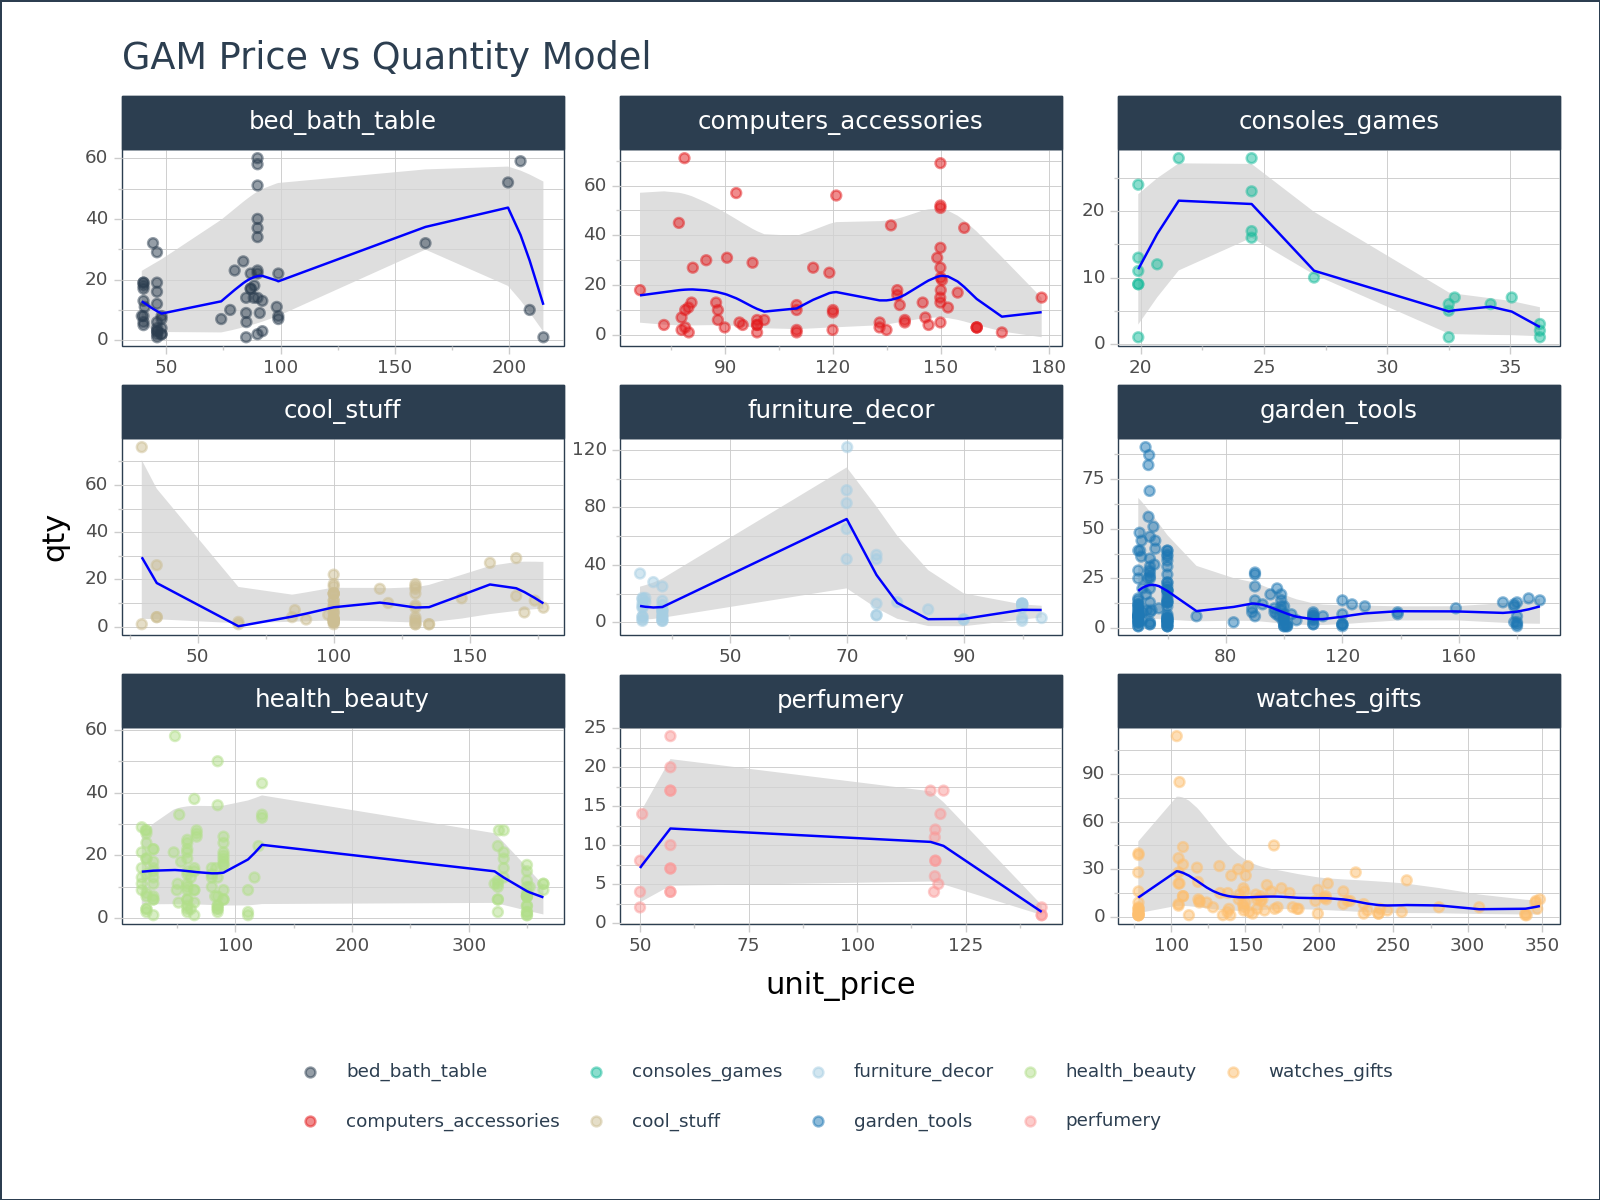

<Figure Size: (800 x 600)>

In [ ]:
from plotnine import ggplot, aes, geom_ribbon, geom_point, geom_line

(
    ggplot(data=all_gam_results, mapping=aes(x='unit_price', y='qty', color='product_category_name', group='product_category_name'))
    + geom_ribbon(aes(ymax="pred_0.975", ymin="pred_0.025"), fill="#d3d3d3", color="#FF000000", alpha=0.75, show_legend=False)
    + geom_point(alpha=0.5)
    + geom_line(aes(y="pred_0.5"), color="blue")
    + facet_wrap("product_category_name", scales = "free")
    + labs(title = "GAM Price vs Quantity Model")
    + scale_color_manual(values = list(tk.palette_timetk().values()))
    + tk.theme_timetk(width = 800, height = 600)
)

In [ ]:
# Optimize for predicted daly revenue

for col in all_gam_results.columns:
  if col.startswith('pred'):
    all_gam_results['revenue_' + col] = all_gam_results['unit_price'] * all_gam_results[col]

In [ ]:
    all_gam_results['revenue_actual'] = all_gam_results['unit_price'] * all_gam_results['qty']

In [ ]:
best_50 = all_gam_results \
    .groupby('product_category_name') \
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1)) \
    .reset_index(level=0, drop=True)

In [ ]:
best_50[['product_category_name','unit_price', 'qty', 'pred_0.5', 'revenue_pred_0.5', 'revenue_actual']]

,product_category_name,unit_price,qty,pred_0.5,revenue_pred_0.5,revenue_actual
674,bed_bath_table,199.509804,52,43.715625,8721.695771,10374.509803
589,computers_accessories,151.990000,11,23.500572,3571.851918,1671.890000
34,consoles_games,24.500000,28,21.090406,516.714939,686.000000
79,cool_stuff,157.360370,27,17.828874,2805.558206,4248.730001
500,furniture_decor,69.900000,44,71.931698,5028.025724,3075.600000
242,garden_tools,187.854286,14,10.969998,2060.761219,2629.960000
349,health_beauty,322.136364,11,14.967868,4821.694411,3543.500000
300,perfumery,116.906667,17,10.411929,1217.223865,1987.413334
276,watches_gifts,105.648625,85,28.421816,3002.725813,8980.133125


In [ ]:
best_975 = all_gam_results \
    .groupby('product_category_name') \
    .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1)) \
    .reset_index(level=0, drop=True)

In [ ]:
best_025 = all_gam_results \
    .groupby('product_category_name') \
    .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1)) \
    .reset_index(level=0, drop=True)

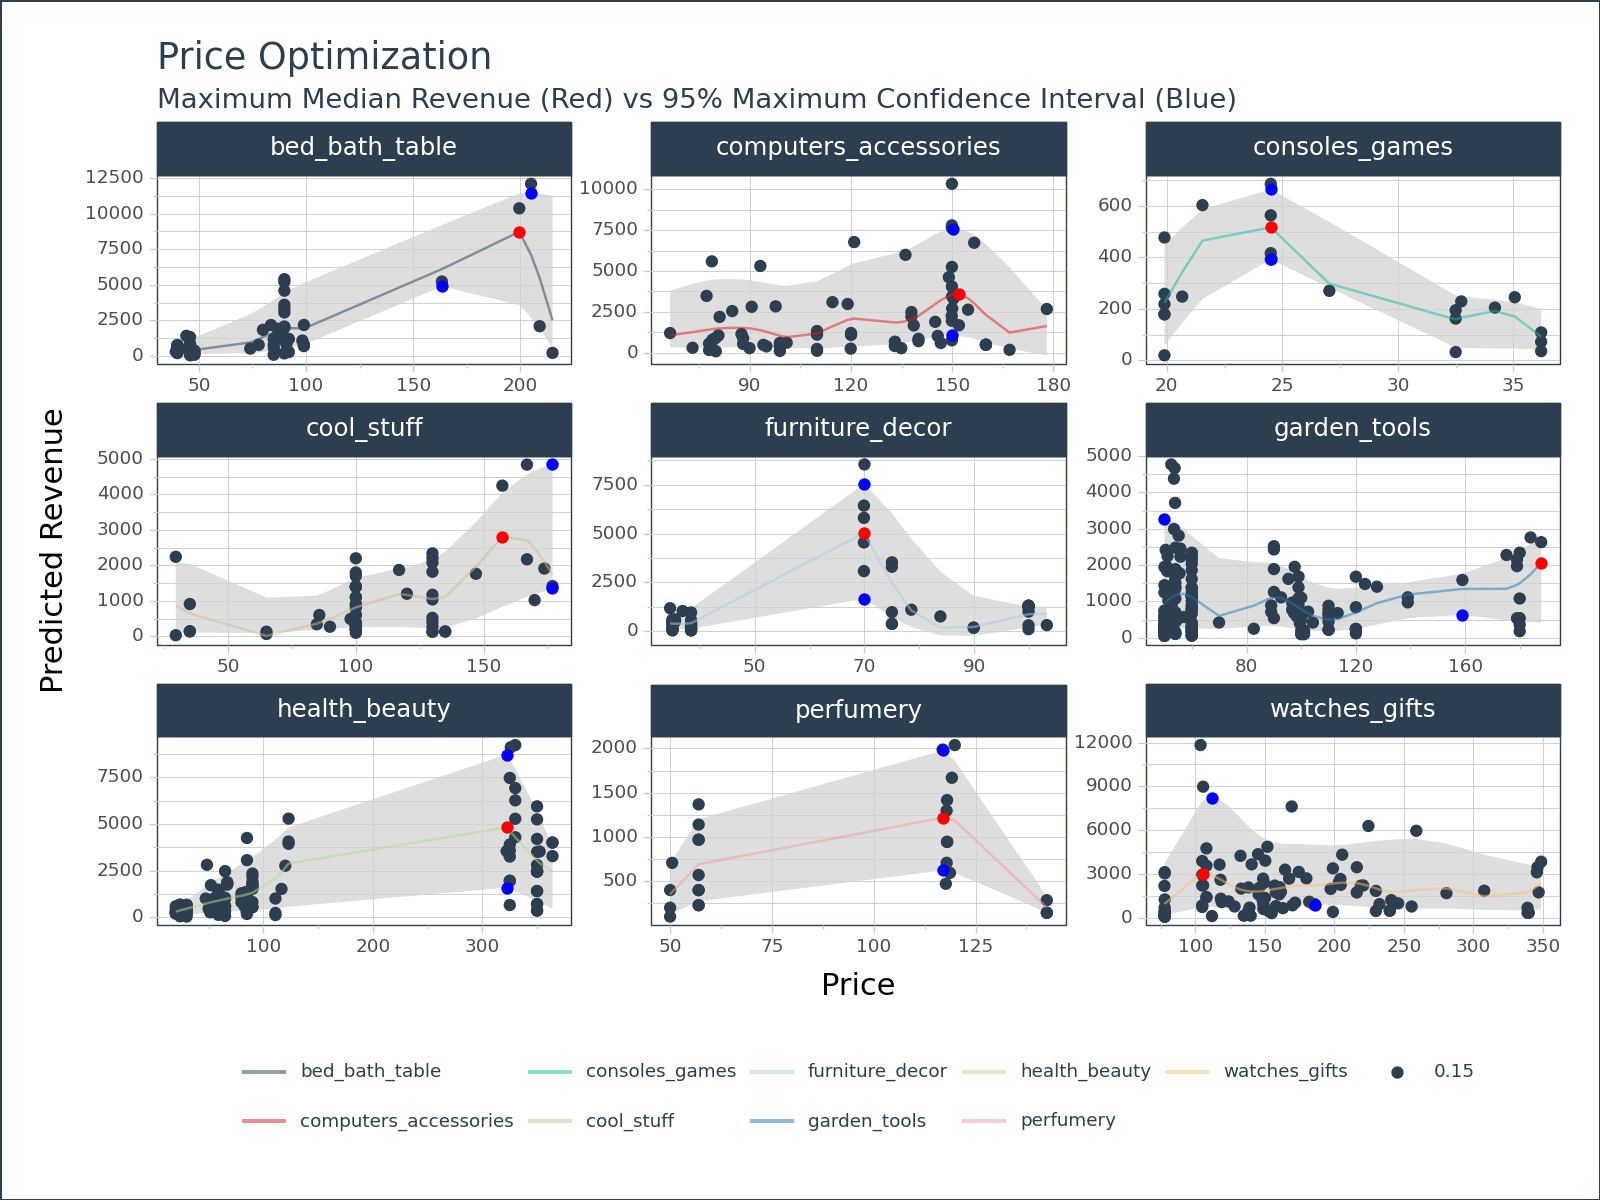

<Figure Size: (800 x 600)>

In [ ]:
from plotnine import ggplot, aes, geom_ribbon, geom_point, geom_line

(
    ggplot(data=all_gam_results, mapping=aes(x='unit_price', y='revenue_pred_0.5', color='product_category_name', group='product_category_name'))
    + geom_ribbon(aes(ymax="revenue_pred_0.975", ymin="revenue_pred_0.025"), fill="#d3d3d3", color="#FF000000", alpha=0.75, show_legend=False)
    + geom_point(aes(y = 'revenue_actual', alpha = 0.15), color = "#2C3E50")
    + geom_line(aes(y="revenue_pred_0.5"), alpha =0.5)
    + geom_point(data = best_50, color = "red")
    + geom_point(data = best_975, mapping = aes(y = 'revenue_pred_0.975'), color = 'blue')
    + geom_point(data = best_025, mapping = aes(y = 'revenue_pred_0.025'), color = 'blue')
    + facet_wrap("product_category_name", scales = "free")
    + labs(title = "Price Optimization",
           subtitle = "Maximum Median Revenue (Red) vs 95% Maximum Confidence Interval (Blue)",
           x = "Price",
           y = "Predicted Revenue")
    + scale_color_manual(values = list(tk.palette_timetk().values()))
    + tk.theme_timetk(width = 800, height = 600)
)

In [ ]:
all_gam_results.columns

Index(['unit_price', 'product_category_name', 'qty', 'pred_0.025', 'pred_0.5',
       'pred_0.975', 'revenue_pred_0.025', 'revenue_pred_0.5',
       'revenue_pred_0.975', 'revenue_actual'],
      dtype='object')

In [ ]:
# Calculate summary statistics for predicted and actual revenue
revenue_pred_stats = all_gam_results[['revenue_pred_0.025', 'revenue_pred_0.5', 'revenue_pred_0.975']].describe()
revenue_actual_stats = all_gam_results['revenue_actual'].describe()

# Print the summary statistics
print("Summary statistics for predicted revenue:")
print(revenue_pred_stats)
print()

print("Summary statistics for actual revenue:")
print(revenue_actual_stats)

Summary statistics for predicted revenue:
       revenue_pred_0.025  revenue_pred_0.5  revenue_pred_0.975
count          676.000000        676.000000          676.000000
mean           418.704537       1422.220453         3373.311610
std            392.372975       1053.487467         2195.647066
min           -244.415161         10.050988          200.101549
25%            224.845522        818.052663         1641.121925
50%            263.812442       1120.058977         3039.955503
75%            559.192764       1899.608095         4811.215591
max           4880.649062       8721.695771        11462.104923

Summary statistics for actual revenue:
count      676.000000
mean      1422.220453
std       1699.375345
min         19.900000
25%        333.700000
50%        807.890000
75%       1887.322500
max      12095.000000
Name: revenue_actual, dtype: float64


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(all_gam_results['revenue_actual'], all_gam_results['revenue_pred_0.5'])
rmse = np.sqrt(mean_squared_error(all_gam_results['revenue_actual'], all_gam_results['revenue_pred_0.5']))

# Print the MAE and RMSE
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 839.7684117989262
Root Mean Squared Error (RMSE): 1266.7371082320549


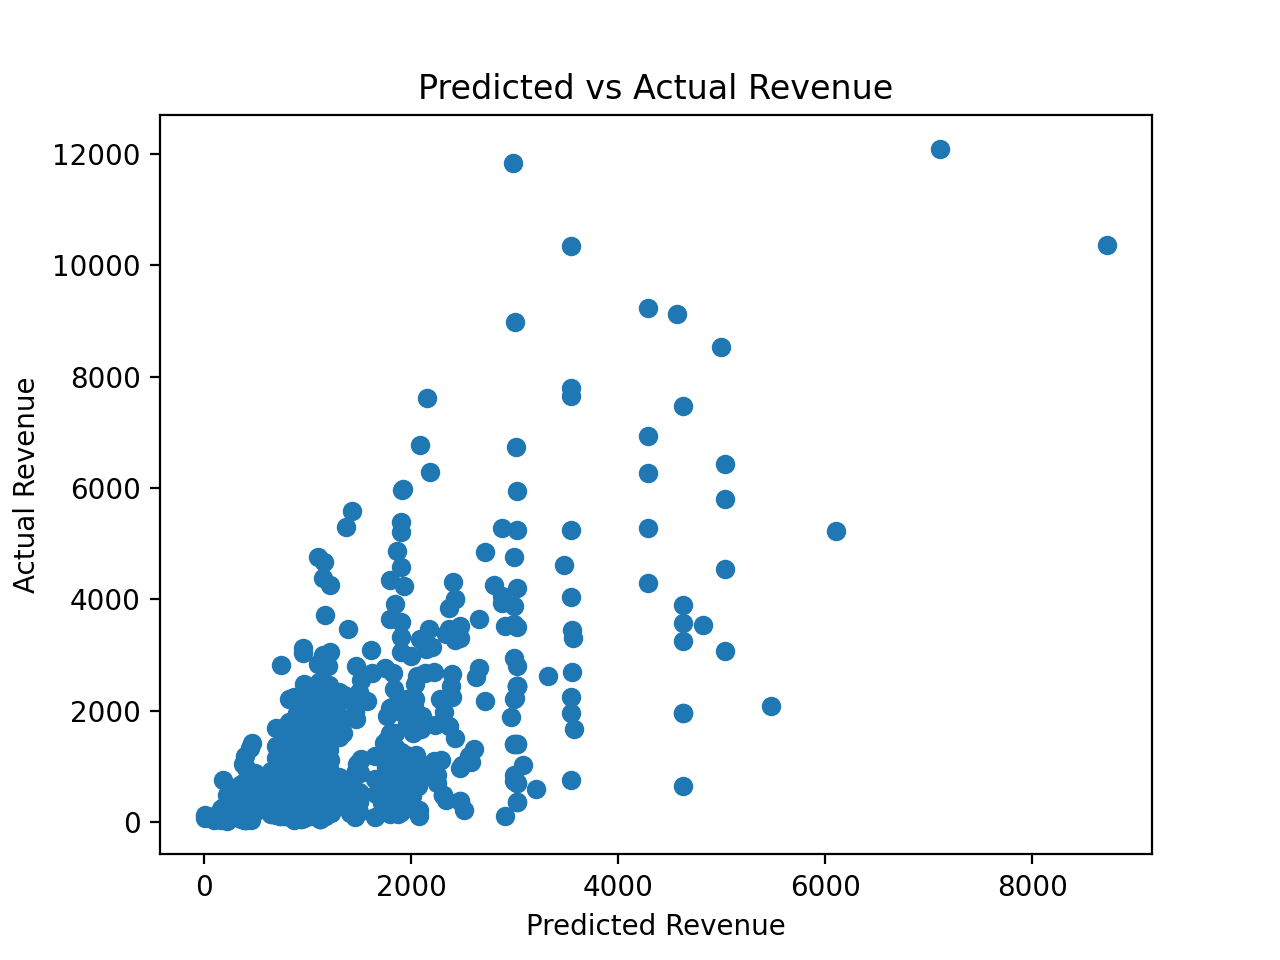

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual revenue
plt.scatter(all_gam_results['revenue_pred_0.5'], all_gam_results['revenue_actual'])
plt.xlabel('Predicted Revenue')
plt.ylabel('Actual Revenue')
plt.title('Predicted vs Actual Revenue')
plt.show()